In [1]:
# Make relevant plots of:
#  - Policies (as histogram)
#  - Policies (as bar chart)
#  - Diff in dose vs observed mortality for diff policies

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle
import matplotlib.pyplot as plt

In [3]:
df_orig = pd.read_csv('../data/full_discretised_input_data.csv')
df_orig.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,SIRS,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input
0,1,3,7245052800,0,17639.826435,0.0,0,0,1,77.5,...,4,0.0,0.0,3500.0,2100.0,230.0,230.0,3270.0,0.0,4.0
1,2,3,7245067200,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5499.0,1999.0,697.0,467.0,4802.0,0.0,4.0
2,3,3,7245081600,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5604.0,105.0,2302.0,1605.0,3302.0,0.0,2.0
3,4,3,7245096000,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5664.0,60.0,2922.0,620.0,2742.0,0.0,2.0
4,5,3,7245110400,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5724.0,60.0,3352.0,430.0,2372.0,0.0,2.0


In [4]:
df_train = pd.read_csv('../scaled_sets/none_train_set_scaled.csv')
df_test = pd.read_csv('../scaled_sets/none_test_set_scaled.csv')
df_train.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input,reward
0,0.000000,3,7245052800,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.797351,0.939195,0.589916,0.750908,0.554500,0.0,4.0,0
1,0.222560,3,7245067200,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.831780,0.934543,0.674384,0.819589,0.580033,0.0,4.0,0
2,0.356608,3,7245081600,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.833222,0.656575,0.765423,0.939329,0.555033,0.0,2.0,0
3,0.452837,3,7245096000,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.834033,0.603831,0.783597,0.847073,0.545700,0.0,2.0,0
4,0.527957,3,7245110400,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.834836,0.603831,0.794059,0.811583,0.539533,0.0,2.0,0


In [5]:
df_train_orig = df_orig[df_orig['icustayid'].isin(df_train['icustayid'].unique())]
df_test_orig = df_orig[df_orig['icustayid'].isin(df_test['icustayid'].unique())]
df_train_orig.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,SIRS,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input
0,1,3,7245052800,0,17639.826435,0.0,0,0,1,77.5,...,4,0.0,0.0,3500.0,2100.0,230.0,230.0,3270.0,0.0,4.0
1,2,3,7245067200,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5499.0,1999.0,697.0,467.0,4802.0,0.0,4.0
2,3,3,7245081600,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5604.0,105.0,2302.0,1605.0,3302.0,0.0,2.0
3,4,3,7245096000,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5664.0,60.0,2922.0,620.0,2742.0,0.0,2.0
4,5,3,7245110400,0,17639.826435,0.0,0,0,1,77.5,...,3,0.0,0.0,5724.0,60.0,3352.0,430.0,2372.0,0.0,2.0


In [6]:
len(df_test), len(df_test_orig)

(49838, 49838)

In [7]:
#  next two cells - check that the extracted trajectories in test dataset are ok
assert len(df_test) == len(df_test_orig)
assert not (False in np.array(df_test['icustayid']) == np.array(df_test_orig['icustayid']))

In [8]:
#  Extract out the interventions from the training dataset and find the medians for each dosage - these
#  represent the continuous analog of the chosen actions
interventions = df_train_orig[["max_dose_vaso", "input_4hourly_tev"]]
interventions.describe()

,max_dose_vaso,input_4hourly_tev
count,173449.000000,173449.000000
mean,0.059901,300.025893
std,0.259803,564.361591
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,70.000000
75%,0.000000,374.023700
max,10.000000,11423.070250


In [9]:
adjusted_vaso = interventions["max_dose_vaso"][interventions["max_dose_vaso"] > 0]
adjusted_iv = interventions["input_4hourly_tev"][interventions["input_4hourly_tev"] > 0]

vaso_vals = [0]
vaso_vals.extend(adjusted_vaso.quantile([0.125,0.375,0.625,0.875]))
iv_vals = [0]
iv_vals.extend(adjusted_iv.quantile([0.125,0.375,0.625,0.875]))

In [10]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = (i,j)
        count += 1     
action_map = {val:key for key, val in inv_action_map.items()}


In [11]:
#  Next two cells - can change to load the correct phys/agent actions we want in the plots
def f(x):
    return action_map[(x[0], x[1])]
phys_actions = list(df_test_orig[['iv_input', 'vaso_input']].apply(f, axis=1))
deeprl2_actions = pickle.load(open( "../dqn_models/none_dqn/dqn_normal_actions_test.p", "rb" ))

In [12]:
phys_actions_tuple = [None for i in range(len(phys_actions))]
deeprl2_actions_tuple = [None for i in range(len(deeprl2_actions))]
for i in range(len(deeprl2_actions)):
    phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
    deeprl2_actions_tuple[i] = inv_action_map[deeprl2_actions[i]]


In [13]:
phys_actions_tuple = np.array(phys_actions_tuple)
deeprl2_actions_tuple = np.array(deeprl2_actions_tuple)

In [14]:
phys_actions_iv = phys_actions_tuple[:,0]
phys_actions_vaso = phys_actions_tuple[:,1]
hist, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

In [15]:
deeprl2_actions_iv = deeprl2_actions_tuple[:,0]
deeprl2_actions_vaso = deeprl2_actions_tuple[:,1]
hist2, _, _ = np.histogram2d(deeprl2_actions_iv, deeprl2_actions_vaso, bins=5)

In [16]:
x_edges = np.arange(-0.5,5)
y_edges = np.arange(-0.5,5)

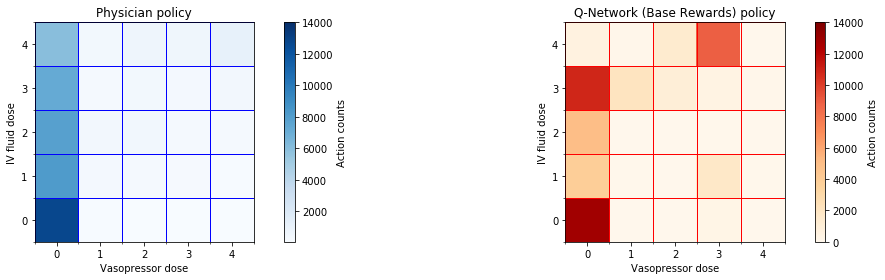

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist2), cmap="OrRd", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

ax1.grid(color='b', linestyle='-', linewidth=1)
ax2.grid(color='r', linestyle='-', linewidth=1)

# Major ticks
ax1.set_xticks(np.arange(0, 5, 1));
ax1.set_yticks(np.arange(0, 5, 1));
ax2.set_xticks(np.arange(0, 5, 1));
ax2.set_yticks(np.arange(0, 5, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 5, 1));
ax1.set_yticklabels(np.arange(0, 5, 1));
ax2.set_xticklabels(np.arange(0, 5, 1));
ax2.set_yticklabels(np.arange(0, 5, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='r', linestyle='-', linewidth=1)

im1 = ax1.pcolormesh(x_edges, y_edges, hist, vmax=14000, cmap='Blues')
f.colorbar(im1, ax=ax1, label = "Action counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist2, vmax=14000, cmap='OrRd')
f.colorbar(im2, ax=ax2, label = "Action counts")

ax1.set_ylabel('IV fluid dose')
ax2.set_ylabel('IV fluid dose')
ax1.set_xlabel('Vasopressor dose')
ax2.set_xlabel('Vasopressor dose')


ax1.set_title("Physician policy")
ax2.set_title("Q-Network (Base Rewards) policy")
plt.savefig("../plots/none/action_policy_2D.png")
plt.tight_layout()

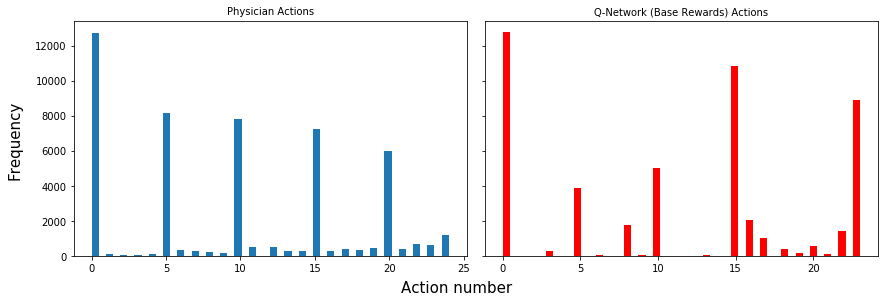

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
ax1.hist(phys_actions, bins=50)
ax1.set_title("Physician Actions", fontsize = 10)
ax2.hist(deeprl2_actions, bins=50, color='r')
ax2.set_title("Q-Network (Base Rewards) Actions", fontsize = 10)
f.text(0.5, -0.03, 'Action number', ha='center', fontsize=15)
f.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
plt.savefig("../plots/none/action_frequency.png")
plt.tight_layout()


In [19]:
def sliding_mean(data_array, window=1):
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)     
    return np.array(new_list)

In [20]:
def make_df_diff(op_actions):
    op_vaso_med = []
    op_iv_med = []
    for action in op_actions:
        iv, vaso = inv_action_map[action]
        op_vaso_med.append(vaso_vals[vaso])
        op_iv_med.append(iv_vals[iv])
    iv_diff = np.array(op_iv_med) - np.array(df_test_orig['input_4hourly_tev'])
    vaso_diff = np.array(op_vaso_med) - np.array(df_test_orig['max_dose_vaso'])
    df_diff = pd.DataFrame()
    df_diff['icustayid'] = np.array(df_test_orig['icustayid'])
    df_diff['mort'] = np.array(df_test_orig['died_in_hosp'])
    df_diff['iv_diff'] = iv_diff
    df_diff['vaso_diff'] = vaso_diff
    
    df_diff['iv_op'] = np.array(op_iv_med)
    df_diff['iv_physician'] = np.array(df_test_orig['input_4hourly_tev'])
    df_diff['vaso_op'] = np.array(op_vaso_med)
    df_diff['vaso_physician'] = np.array(df_test_orig['max_dose_vaso'])
    return df_diff
df_diff = make_df_diff(deeprl2_actions)
df_diff.head()

,icustayid,mort,iv_diff,vaso_diff,iv_op,iv_physician,vaso_op,vaso_physician
0,33,1,-419.666667,0.041,305.333333,725.000000,0.041,0.0
1,33,1,-500.152133,0.000,305.333333,805.485467,0.000,0.0
2,33,1,-547.314667,0.000,305.333333,852.648000,0.000,0.0
3,33,1,-422.314667,0.000,305.333333,727.648000,0.000,0.0
4,33,1,-297.314667,0.000,305.333333,602.648000,0.000,0.0


In [21]:
from scipy.stats import sem
def make_iv_plot_data(df_diff):
    bin_medians_iv = []
    mort_iv = []
    mort_std_iv= []
    i = -800
    while i <= 900:
        count = df_diff.loc[(df_diff['iv_diff'] > i-50) & (df_diff['iv_diff']<i+50)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_iv.append(i)
                mort_iv.append(res)
                mort_std_iv.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 100
    return bin_medians_iv, mort_iv, mort_std_iv

def make_vaso_plot_data(df_diff):
    bin_medians_vaso = []
    mort_vaso= []
    mort_std_vaso= []
    i = -0.6
    while i <= 0.8:
        count = df_diff.loc[(df_diff['vaso_diff']>i-0.05) & (df_diff['vaso_diff']<i+0.05)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_vaso.append(i)
                mort_vaso.append(res)
                mort_std_vaso.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 0.1
    return bin_medians_vaso, mort_vaso, mort_std_vaso

In [22]:
def plot_iv_diff_mort(bin_medians_iv, mort_iv_deep, mort_std_iv_deep):
    ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
    ax2.fill_between(bin_med_iv_deep, 
                     sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep, 
                     sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, 
                     color='tomato')
    ax2.set_title('Q-Network (Base Rewards) - IV fluids')
    x_iv = [i for i in range(-800,900,400)]
    ax2.set_xticks(x_iv)
    ax2.grid()
    

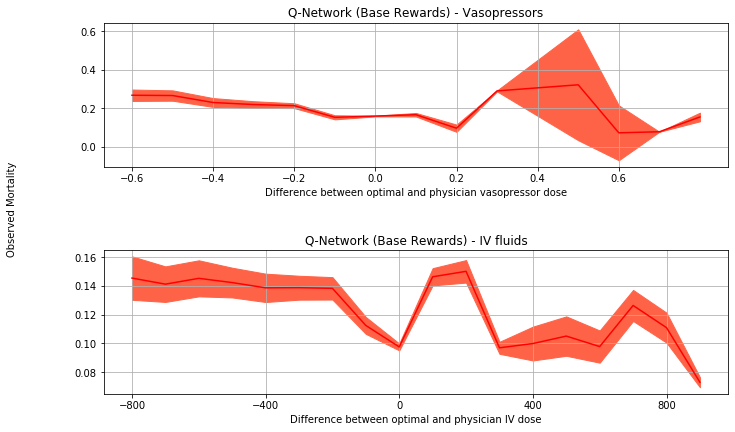

In [23]:
df_diff_deeprl2 = make_df_diff(deeprl2_actions)
bin_med_iv_deep, mort_iv_deep, mort_std_iv_deep = make_iv_plot_data(df_diff_deeprl2)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff_deeprl2)

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize = (10.5,7))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='r')
ax1.fill_between(bin_med_vaso_deep, 
                 sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, 
                 color='tomato')
ax1.set_title('Q-Network (Base Rewards) - Vasopressors')
x_r = [i/10.0 for i in range(-6,8,2)]
y_r = [i/20.0 for i in range(0,20,2)]
ax1.set_xticks(x_r)
# ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
ax2.fill_between(bin_med_iv_deep, 
                 sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep, 
                 sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, 
                 color='tomato')
ax2.set_title('Q-Network (Base Rewards) - IV fluids')
x_iv = [i for i in range(-800,900,400)]

ax2.set_xticks(x_iv)
ax2.grid()


plt.tight_layout(pad=5.0)

ax1.set_xlabel('Difference between optimal and physician vasopressor dose',fontsize=10)
ax2.set_xlabel('Difference between optimal and physician IV dose', fontsize=10)
fig.text(-0.02, 0.5, 'Observed Mortality', va='center', rotation='vertical', fontsize = 10)

plt.savefig("../plots/none/dq_diff_mort.png")